# ___Cost Function - Logistic Regression___
-----------------

In [1]:
import numpy as np
np.seterr(all = "raise")
import matplotlib.pyplot as plt

In [2]:
# the squared error cost function that we've used for linear regression is not an ideal cost function for logistic regression!
# imagine a training datset for a classification problem!
# it contains the following predictors

# 1) age of the patient
# 2) tumour size
# 3) RBC count
# 4) WBC count
# 5) platelets count
# 6) haemoglobin content
# 7) blood pH

# and a target variable - tumour status
# which is a nominal categorical variable - that can be either benign or malignant

In [3]:
# this is a binary classification task and the logistic regression model is,

# ___$f_{\overrightarrow{w}, b}(\overrightarrow{x}) = \frac{1}{1 + e^{- \overrightarrow{w} \cdot \overrightarrow{x} + b}}$___

In [4]:
# recall, that for linear regression the model was,

# ___$f_{\overrightarrow{w}, b}(\overrightarrow{x}) = \overrightarrow{w} \cdot \overrightarrow{x} + b$___

In [5]:
# and the cost function was,

# ___$j(\overrightarrow{w}, b) = \frac{1}{2N}\sum_{i = 0}^{N}(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}) - y_i)^2$___
# ___$j(\overrightarrow{w}, b) = \frac{1}{2N}\sum_{i = 0}^{N}(\overrightarrow{w} \cdot \overrightarrow{x_i} + b - y_i)^2$___

In [6]:
# the issue here is that the cost function of logistic regression will not produce a smooth convex curve like the cost function of 
# linear regression did
# cost function of logistic regression will produce a non-convex staggered curve with numerous local minima
# the presence of many local minima will affect the gradient descent!
# hence, the need for a new, improved cost function!

In [7]:
# we can move the 1/2 from 1/2N inside the summation, like so

# ___$j(\overrightarrow{w}, b) = \frac{1}{N}\sum_{i = 0}^{N}\frac{1}{2}(\overrightarrow{w} \cdot \overrightarrow{x_i} + b - y_i)^2$___

In [8]:
# the loss term for a single training record (row) here is,
# (the subscript i denotes the ith record in the training data)
# N is the total number of records

# ___$\frac{1}{2}(\overrightarrow{w} \cdot \overrightarrow{x_i} + b - y_i)^2$___

In [9]:
# this term can be expressed as a function of the model and the true label
# loss per record can thus be redefined as,

# ___$j(\overrightarrow{w}, b) = \frac{1}{N}\sum_{i = 0}^{N}l(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}), y_i)$___

In [2]:
# where l denotes the loss per record

## ___Logistic Loss Function___
-------------------

In [11]:
# the loss function used for logistic regression is,

# ___$l(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}), y_i) = 
\begin{cases}
-log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))~~~~~~~~~~~\text{if}~~~y_i = 1\\
-log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))~~~~\text{if}~~~y_i = 0\\
\end{cases}$___

In [12]:
# this new loss function is a conditional function that uses different expressions depending on the value of the true label in the training data

In [13]:
# if the true label is 1 for a given record, then the loss function is 

# $-log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$

In [57]:
# if the training label for a select row is 0, then the loss function is,

# $-log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$
_but_
# $log(x - y) = log(x) - log(y)$
_hence_
# $-log(1) + log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$
# $log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$

-------------------
## ___Loss function vs. Cost function___
-------------------

In [58]:
# loss function is a function that computes the deviation of the prediction from the expected outcome per record or row
# cost function is the one that averages all the losses over all the records in the training dataset!

-----------------------

In [59]:
# how the loss function changes with x when the actual target is 1 and 0

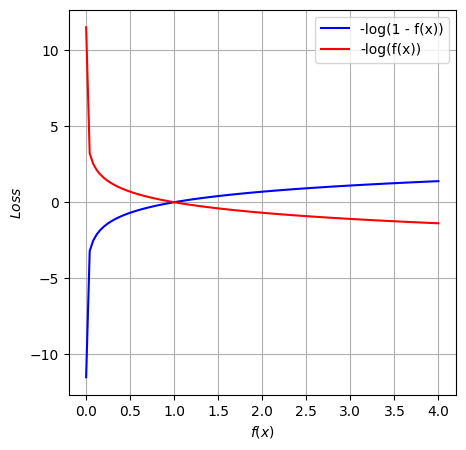

In [14]:
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)

f = np.linspace(0.00001, 4, num = 100)
y_teq1 = -np.log(f)
y_teq0 = np.log(f)
axes.plot(f, y_teq0, label = "-log(1 - f(x))", color = "blue", marker = "none", linestyle = "-")
axes.plot(f, y_teq1, label = "-log(f(x))", color = "red",  marker = "none", linestyle = "-")
axes.legend()
axes.grid()
axes.set_xlabel(r"$f(x)$")
axes.set_ylabel(r"$Loss$")
plt.show()

In [15]:
# but remember, f(x) here represents the output of logistic regression and hence will always be in the range of 0 and 1
# thus, we can safely ignore the part of the graph where f > 1

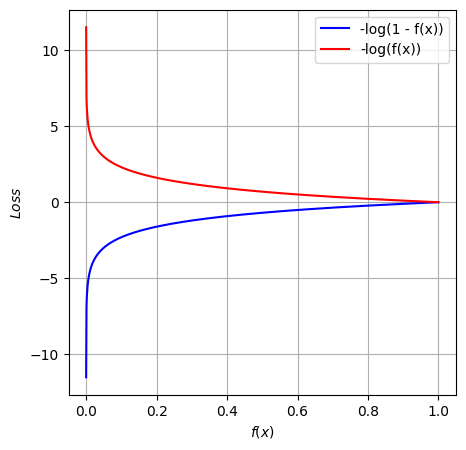

In [110]:
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)

f = np.linspace(0.00001, 1, num = 1000)
y_teq1 = -np.log(f)
y_teq0 = np.log(f)
axes.plot(f, y_teq0, label = "-log(1 - f(x))", color = "blue", marker = "none", linestyle = "-")
axes.plot(f, y_teq1, label = "-log(f(x))", color = "red",  marker = "none", linestyle = "-")
axes.legend()
axes.grid()
axes.set_xlabel(r"$f(x)$")
axes.set_ylabel(r"$Loss$")
plt.show()

In [111]:
# both lines intersect the x axis at x = 1.0

In [112]:
# if our logistic regression model predicts a probability close to 1 and the true label is 1, then the loss is very small (almost 0.00)
# because the red line almost converges with the x axis at x = 1

In [113]:
# if the algorithm's prediction is 0.684 and the true label is 1, the the loss is around,

y_teq1[np.argmax(np.isclose(f, 0.6868, rtol = 0.001))]

0.37587258825086156

In [114]:
# if the algorithm's prediction is 0.32 and the true label is 1, the the loss is around,

y_teq1[np.argmax(np.isclose(f, 0.3232, rtol = 0.001))]

1.1290815268523313

In [115]:
# if the algorithm's prediction is 0.1 and the true label is 1, the the loss is around,

y_teq1[np.argmax(np.isclose(f, 0.12122, rtol = 0.001))]

2.1108916737008347

In [116]:
# if the algorithm's prediction is 0.001 and the true label is 1, the the loss is around,

y_teq1[np.argmax(np.isclose(f, 0.001, rtol = 0.001))]

11.512925464970229

In [117]:
# consider the cases where the true label is 0,
# if the algorithm's prediction is 0.031 and the true label is 0, the the loss is around,

y_teq0[np.argmax(np.isclose(f, 1 - 0.031, rtol = 0.001))]

-0.03152237112409383

In [118]:
# if the algorithm's prediction is 0.59595061 and the true label is 0, the the loss is around,

y_teq0[np.argmax(np.isclose(f, 1 - 0.59595061, rtol = 0.001))]

-0.9053251730730828

In [119]:
# if the algorithm's prediction is 0.99999 and the true label is 0, the the loss is around,

y_teq0[np.argmax(np.isclose(f, 1 - 0.99999, rtol = 0.001))]

-11.512925464970229

In [121]:
# the more the prediction deviates from the target, higher the penalty imposed by the loss function will be,
# this will nudge the model to fine tune the coefficients during gradient descent, to make more accurate predictions

# ___Simplified Cost Function___
----------------

In [149]:
# the logistic loss function is defined as follows,

# ___$l(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}), y_i) = 
\begin{cases}
-log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))~~~~~~~~~~~\text{if}~~ y_i = 1\\              
-log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))~~~~\text{if}~~ y_i = 0\
\end{cases}
$___

In [150]:
# since we are still discussing a binary classification problem, the prediction can either be 0 or 1!
# the above equation can be rewrittenas follows,

# ___$l(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}), y_i) = -y_i \times log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i})) - (1 - y_i) \times log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$___

In [151]:
# to prepare a singular equation from the above, we need to make the complementary expression evaluate to 0 when the opposite predicate is true
# if we were to combine these two expressions,
# when y_i = 1, we want the conditional expression for y_i = 0 to evaluate to nothing
# and vice versa

In [152]:
# when y_i = 0, we can multiply the y_i = 1 conditional expression by y_i to cancel it out,
# and we can multiply y_i = 0 conditional by (1 - y_i) as it won't affect anything

# ___$-y_i~log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i})) -(1 - y_i)~log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$___

In [153]:
# when y_i = 1, we can make the conditional expression for y_i = 0 disappear by multiplying it by (1 - y_i) which is 0 when y_i = 1
# and the y_i = 1 conditional by y_i as it will not make any difference,

# ___$-y_i~log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i})) -(1 - y_i)~log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$___

In [3]:
# now we have gotten a single equation that works for both situations :)
# we can now use this simplified loss function to develop a simpler cost function!

# ___$j(\overrightarrow{w},b) = \frac{1}{N}\sum_{i=0}^{N} -y_i~log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i})) -(1 - y_i)~log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$___

# ___$j(\overrightarrow{w},b) = -\frac{1}{N}\sum_{i=0}^{N} y_i~log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i})) + (1 - y_i)~log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$___

In [4]:
# the above is a convex function, so will be conducive to gradient descent